In [5]:
# import lib
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

np.random.seed(6789)

(100, 2)


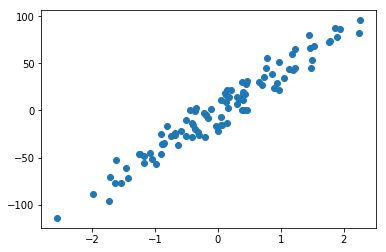

In [33]:
# create data
n_samples  = 100
n_outliers = 5
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=10, random_state=0)
X         = np.append(x,y[:,None],1)  

print(X.shape)
plt.scatter(X[:,0],X[:,1]); plt.show()

In [242]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())

m = np.zeros_like(W)
v = np.zeros_like(W)


for iter in range(1000):
    loss = (X - X @ w @ w.T)
    grad = 2 * (X.T @ loss @ w) + 2*(w.T@X.T@loss).T
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%100 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.00000000008 * (m_hat/np.sqrt())
    w = w / np.sqrt((w**2).sum())




Current loss: 284.05237172135617  Weight : [0.55641108 0.83090716]
Current loss: 285.3220977190858  Weight : [0.55759482 0.83011325]
Current loss: 286.59516832920394  Weight : [0.55877899 0.82931661]
Current loss: 287.8715715627193  Weight : [0.55996357 0.82851723]
Current loss: 289.15129523591366  Weight : [0.56114854 0.82771512]
Current loss: 290.4343269702056  Weight : [0.56233389 0.82691027]
Current loss: 291.7206541920365  Weight : [0.56351961 0.82610269]
Current loss: 293.01026413277316  Weight : [0.56470568 0.82529237]
Current loss: 294.3031438286365  Weight : [0.56589208 0.82447932]
Current loss: 295.5992801206475  Weight : [0.5670788  0.82366355]


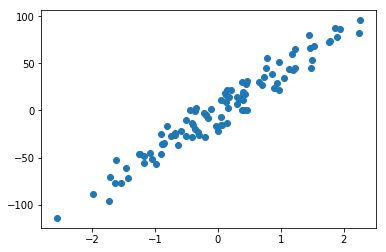

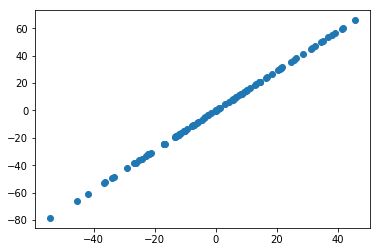

[[0.56826583]
 [0.82284503]]


In [243]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); 
plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [222]:
print(X.shape)

(100, 2)


(2,)


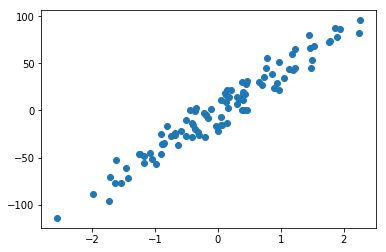

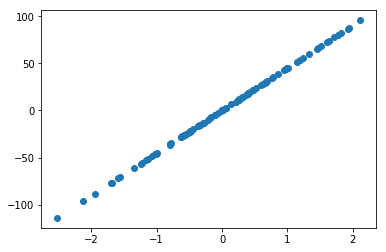

[[0.63201265]
 [0.77495807]]


In [241]:
cov = X.T @ X / X.shape[0]
evals,evecs = np.linalg.eig(cov)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
print(evecs[0,:].shape)
good_project = evecs[0,:][:,None]
recon = (X @ good_project @ good_project.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [56]:
# simple objective
w = np.random.randn(2,1)
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[[-0.99090501]
 [ 0.4142096 ]]
[[-0.92263583]
 [ 0.3856723 ]]
1.0


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. NumPy?, H., Hoogendoorn, E., Feicho, E., Travnik, J., & Hsu, W. (2014). How to normalize an array in NumPy?. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
4.